In [104]:
#This project was done in Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from  keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import time

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
0,0.0,24.0,0.0,0.0,5.0,247.30,2.0,0.0,4.0,17.0,...,1.0,591.3,0.0,0.0,0.0,0.0,782.40,4.0,1458.0,0.8571
1,1.0,440875.0,1.0,1.0,0.0,37.65,1.0,1.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,119.60,3.0,1511.0,0.0400
2,2.0,878242.0,2.0,0.0,1.0,93.73,1.0,0.0,2.0,54.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3248.00,5.0,1583.0,0.7407
3,3.0,1319841.0,3.0,0.0,0.0,95.88,0.0,0.0,0.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.49,1.0,1489.0,0.1146
4,4.0,1757883.0,4.0,0.0,1.0,0.00,0.0,0.0,1.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,640.80,4.0,1475.0,0.5217


In [5]:
X = train

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 26 columns):
Unnamed: 0             13716 non-null int64
index                  13716 non-null int64
soldierId              13716 non-null float64
shipId                 13716 non-null float64
attackId               13716 non-null float64
assists                13716 non-null float64
greekFireItems         13716 non-null float64
healthLost             13716 non-null float64
knockedOutSoldiers     13716 non-null float64
throatSlits            13716 non-null float64
healingPotionsUsed     13716 non-null float64
killRank               13716 non-null float64
killPoints             13716 non-null float64
enemiesKilled          13716 non-null float64
killingStreaks         13716 non-null float64
farthermostKill        13716 non-null float64
numShips               13716 non-null float64
numSaves               13716 non-null float64
horseRideDistance      13716 non-null float64
horseRideKills       

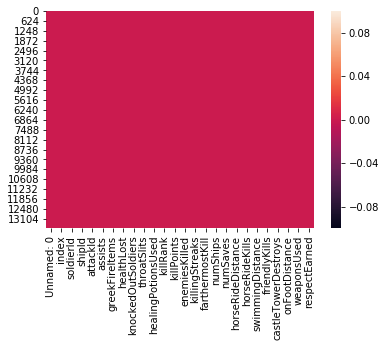

In [70]:
#sns.heatmap(X.isnull())

In [8]:
#sns.pairplot(X_train)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 25 columns):
soldierId              float64
shipId                 float64
attackId               float64
assists                float64
greekFireItems         float64
healthLost             float64
knockedOutSoldiers     float64
throatSlits            float64
healingPotionsUsed     float64
killRank               float64
killPoints             float64
enemiesKilled          float64
killingStreaks         float64
farthermostKill        float64
numShips               float64
numSaves               float64
horseRideDistance      float64
horseRideKills         float64
swimmingDistance       float64
friendlyKills          float64
castleTowerDestroys    float64
onFootDistance         float64
weaponsUsed            float64
respectEarned          float64
bestSoldierPerc        float64
dtypes: float64(25)
memory usage: 831.1 MB


In [71]:
X.columns

Index(['Unnamed: 0', 'index', 'soldierId', 'shipId', 'attackId', 'assists',
       'greekFireItems', 'healthLost', 'knockedOutSoldiers', 'throatSlits',
       'healingPotionsUsed', 'killRank', 'killPoints', 'enemiesKilled',
       'killingStreaks', 'farthermostKill', 'numShips', 'numSaves',
       'horseRideDistance', 'horseRideKills', 'swimmingDistance',
       'friendlyKills', 'castleTowerDestroys', 'onFootDistance', 'weaponsUsed',
       'respectEarned'],
      dtype='object')

In [11]:
cols = ['soldierId','shipId','attackId','horseRideDistance']

In [12]:
X=X.drop(cols,axis=1)

In [13]:
y = X['bestSoldierPerc']

In [14]:
X =X.drop(['bestSoldierPerc'],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()

In [79]:
X = st.fit_transform(X)

In [80]:
X

array([[-0.41367533, -0.62590531, -0.18989026, ..., -0.54717412,
         1.64439828, -0.01655131],
       [-0.41367533,  0.03825354,  1.64318472, ..., -0.32996232,
         0.29088064,  0.65235883],
       [-0.41367533, -0.62590531, -0.80091526, ..., -0.86879219,
        -1.062637  , -0.65973414],
       ...,
       [ 1.24295849, -0.62590531, -0.00719379, ..., -0.66954696,
        -0.61146446,  0.009176  ],
       [-0.41367533, -0.62590531, -0.80091526, ..., -0.83697526,
        -0.61146446, -0.99418921],
       [-0.41367533, -0.62590531, -0.80091526, ...,  1.78764408,
         0.74205319, -0.29955176]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 43)

In [21]:
n_col = X_train.shape[1]
n_col

20

In [22]:
from keras.layers import BatchNormalization
import keras.backend as K

In [23]:
K.clear_session()

In [24]:
model = Sequential()
model.add(Dense(12,input_shape = (n_col,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(Adam(lr=0.01),loss='mean_absolute_error',metrics=['accuracy'],)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
from keras.callbacks import EarlyStopping

In [26]:
early_stopping_monitor = EarlyStopping(patience=3)

In [46]:
model.fit(X_train,y_train, validation_split=0.2, epochs=25)

Train on 2962988 samples, validate on 740747 samples
Epoch 1/25
2962988/2962988 [==============================] - 133s 45us/step - loss: 0.0906 - acc: 0.0810 - val_loss: 0.0844 - val_acc: 0.0812
Epoch 2/25
2962988/2962988 [==============================] - 132s 45us/step - loss: 0.0905 - acc: 0.0810 - val_loss: 0.0810 - val_acc: 0.0812
Epoch 3/25
2962988/2962988 [==============================] - 129s 44us/step - loss: 0.0906 - acc: 0.0810 - val_loss: 0.0751 - val_acc: 0.0812
Epoch 4/25
2962988/2962988 [==============================] - 128s 43us/step - loss: 0.0906 - acc: 0.0809 - val_loss: 0.0759 - val_acc: 0.0812
Epoch 5/25
2962988/2962988 [==============================] - 132s 45us/step - loss: 0.0908 - acc: 0.0810 - val_loss: 0.0886 - val_acc: 0.0811
Epoch 6/25
2962988/2962988 [==============================] - 131s 44us/step - loss: 0.0906 - acc: 0.0810 - val_loss: 0.0735 - val_acc: 0.0812
Epoch 7/25
2962988/2962988 [==============================] - 133s 45us/step - loss: 0.09

In [62]:
#model.save('intbit.h5')

In [47]:
pred = model.predict(X_test)

In [48]:
pred

array([[0.19554639],
       [0.16668364],
       [0.51156956],
       ...,
       [0.8752296 ],
       [0.8508376 ],
       [0.8002273 ]], dtype=float32)

In [39]:
#from sklearn.ensemble import RandomForestRegressor

In [40]:
#rfr = RandomForestRegressor(n_estimators=100)

In [41]:
#rfr.fit(X_train,y_train)

In [42]:
#pred = rfr.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error

In [88]:
mean_absolute_error(y_test,pred)

0.08208486518563717

In [61]:
pred

array([[0.19554639],
       [0.16668364],
       [0.51156956],
       ...,
       [0.8752296 ],
       [0.8508376 ],
       [0.8002273 ]], dtype=float32)

In [52]:
y_test

3174790    0.1923
1897919    0.1413
721452     0.5517
526369     0.1429
3285949    0.1481
2762563    0.6735
2947307    0.6522
260017     0.6207
1760132    0.0000
1229122    0.3061
1034120    0.2947
2558567    0.2268
3367098    0.1034
2006051    0.6735
2943944    1.0000
3771465    0.0345
4229014    0.5417
3291260    0.1957
1641102    0.2917
1606595    0.0435
461906     0.4583
2120474    0.1020
1764351    0.7586
2087621    0.0000
3411173    0.8387
705928     0.9375
23065      0.0741
2268930    1.0000
2392213    0.0204
3395873    0.4444
            ...  
1256265    0.9583
3904908    0.6154
328737     0.7391
2150089    0.9167
3079295    0.0217
2990536    0.6667
1764404    0.4490
4089023    0.0385
752437     0.7692
2030588    0.0714
185109     0.3125
1006237    0.0417
2176653    0.4157
1972661    1.0000
3810814    0.0000
402846     0.8493
2676556    0.4479
2953150    0.1064
703162     0.6250
2472333    0.7778
3647125    0.0370
163343     0.3191
2401925    1.0000
4067394    0.1333
2761289   

In [63]:
test = pd.read_csv('test.csv')

In [91]:
soid = test['soldierId']

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 26 columns):
Unnamed: 0             13716 non-null int64
index                  13716 non-null int64
soldierId              13716 non-null float64
shipId                 13716 non-null float64
attackId               13716 non-null float64
assists                13716 non-null float64
greekFireItems         13716 non-null float64
healthLost             13716 non-null float64
knockedOutSoldiers     13716 non-null float64
throatSlits            13716 non-null float64
healingPotionsUsed     13716 non-null float64
killRank               13716 non-null float64
killPoints             13716 non-null float64
enemiesKilled          13716 non-null float64
killingStreaks         13716 non-null float64
farthermostKill        13716 non-null float64
numShips               13716 non-null float64
numSaves               13716 non-null float64
horseRideDistance      13716 non-null float64
horseRideKills       

In [68]:
X = test

In [73]:
X.columns

Index(['Unnamed: 0', 'index', 'soldierId', 'shipId', 'attackId', 'assists',
       'greekFireItems', 'healthLost', 'knockedOutSoldiers', 'throatSlits',
       'healingPotionsUsed', 'killRank', 'killPoints', 'enemiesKilled',
       'killingStreaks', 'farthermostKill', 'numShips', 'numSaves',
       'horseRideDistance', 'horseRideKills', 'swimmingDistance',
       'friendlyKills', 'castleTowerDestroys', 'onFootDistance', 'weaponsUsed',
       'respectEarned'],
      dtype='object')

In [74]:
cols = ['Unnamed: 0', 'index','soldierId','shipId','attackId','horseRideDistance']

In [75]:
X=X.drop(cols,axis=1)

In [ ]:
X = st.fit_transform(X)

In [ ]:
X

In [81]:
predt = model.predict(X)

In [82]:
predt

array([[0.42044187],
       [0.5307311 ],
       [0.24703282],
       ...,
       [0.2583816 ],
       [0.18211466],
       [0.8002273 ]], dtype=float32)

In [94]:
pd.DataFrame(data=predt,index=soid,columns=['bestSoldierPerc'])

,bestSoldierPerc
soldierId,
47734.0,0.420442
47735.0,0.530731
47736.0,0.247033
47737.0,0.299098
47738.0,0.134223
47739.0,0.018832
47740.0,0.182255
47741.0,0.244347
47742.0,0.804957


In [95]:
subsp = pd.read_csv('sample_submission.csv')

In [99]:
subsp['bestSoldierPerc'] = predt

In [100]:
subsp

,soldierId,bestSoldierPerc
0,47734,0.420442
1,47735,0.530731
2,47736,0.247033
3,47737,0.299098
4,47738,0.134223
5,47739,0.018832
6,47740,0.182255
7,47741,0.244347
8,47742,0.804957
9,47743,0.377418


In [103]:
subsp.to_csv('final.csv',index=False)